# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [1]:
import pandas as pd

forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [41]:
forestfires.shape

(515, 14)

In [43]:
forestfires.dtypes

X             int64
Y             int64
month        object
day          object
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
area_log    float64
dtype: object

## Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [2]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Question 1.2: Apply log(area+1) to the data

In [3]:
import numpy as np

forestfires['area_log'] = np.log(forestfires['area'] + 1)

In [4]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [5]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


## Question 2.1: Visually explore the data using pairplot.

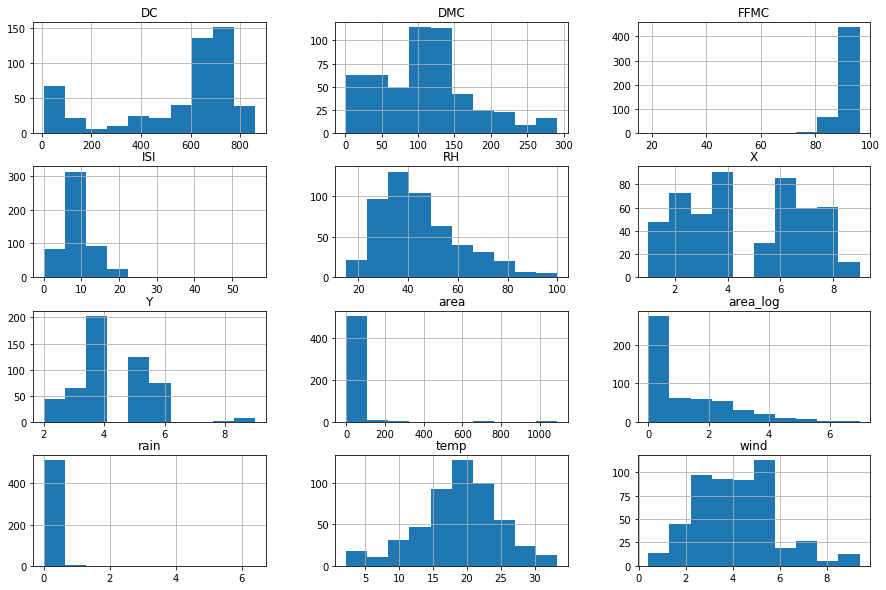

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

forestfires.hist(figsize = (15,10))
plt.show()

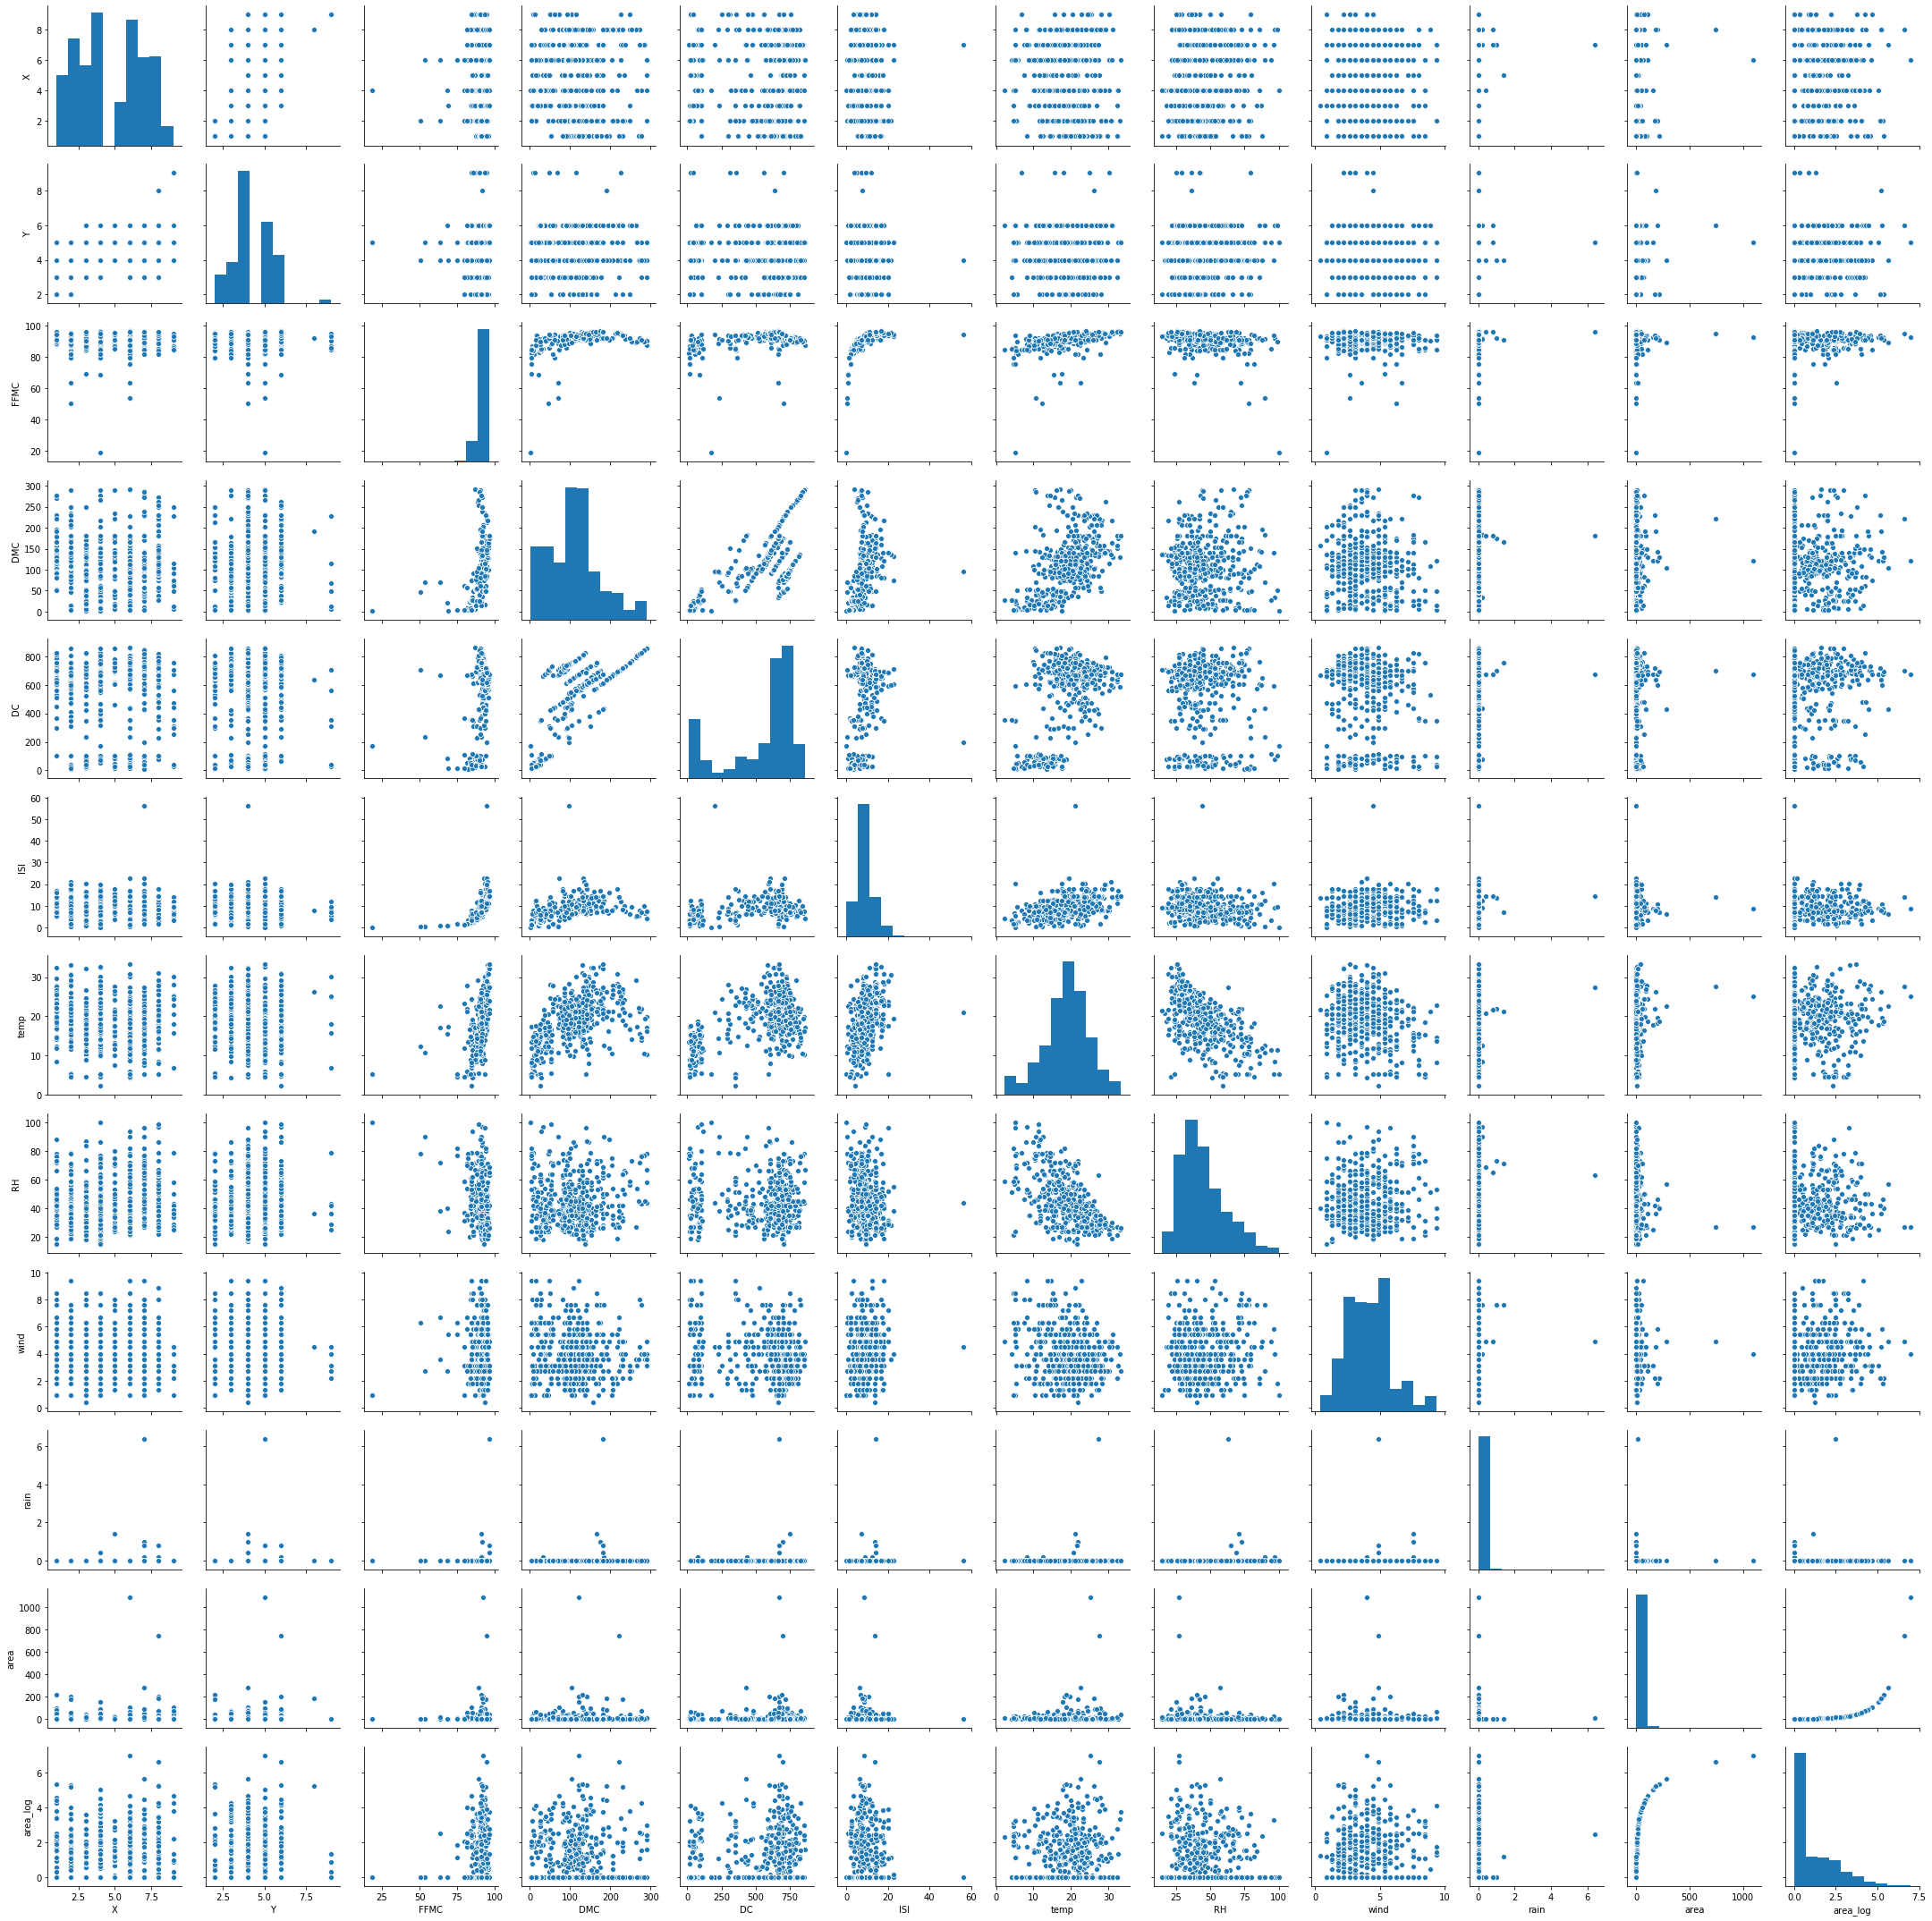

In [7]:
sns.pairplot(forestfires)

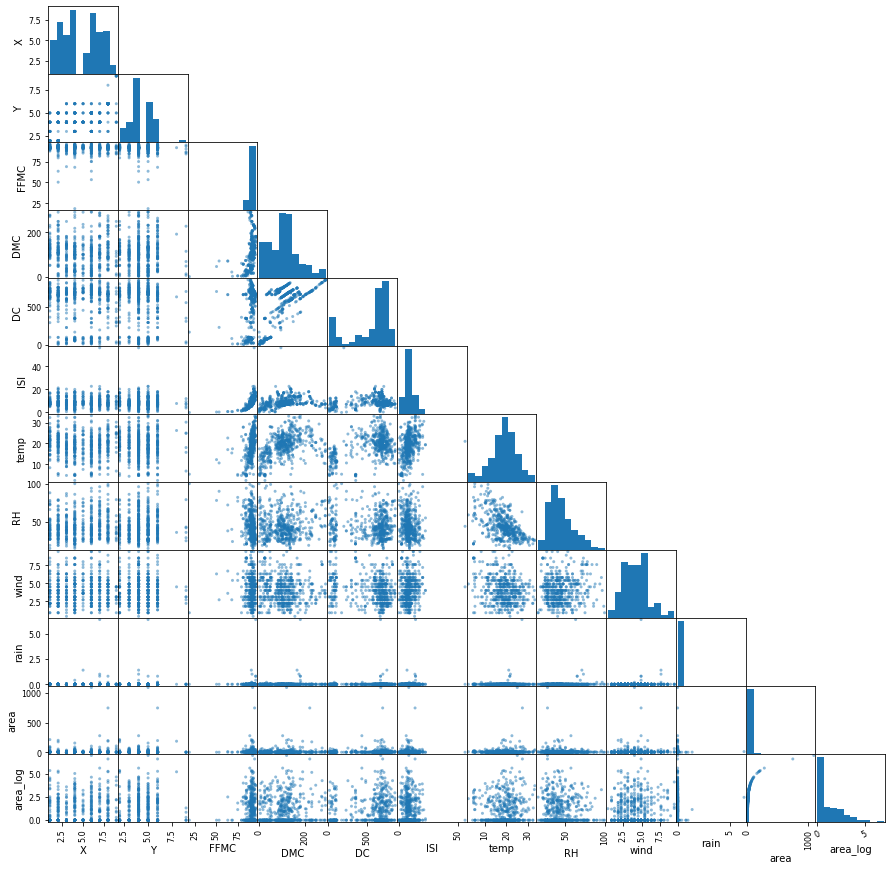

In [8]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(forestfires, figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

In [9]:
forestfires_numeric = forestfires.copy()
forestfires_numeric.drop(['month', 'day'], axis = 1, inplace = True)

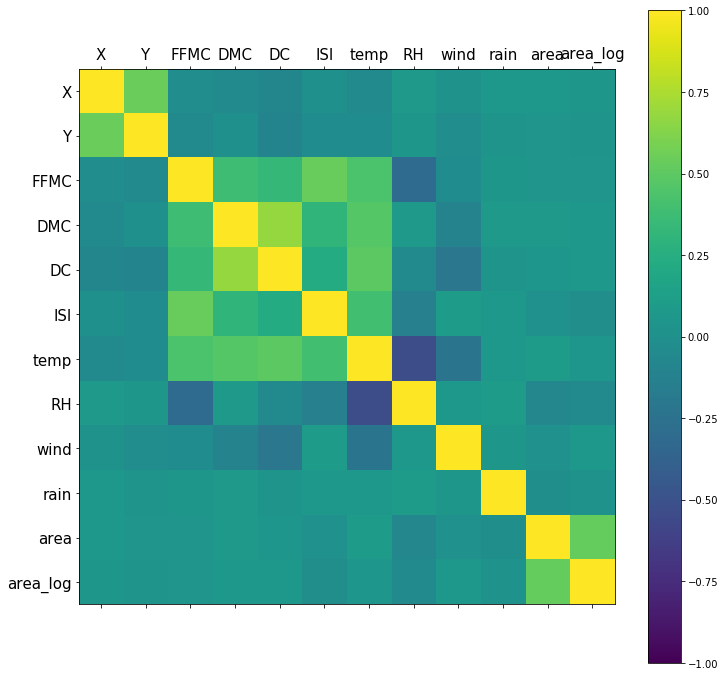

In [10]:
correlations = forestfires_numeric.corr()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(forestfires_numeric, fontsize = 15)
ax.set_yticklabels(forestfires_numeric, fontsize = 15)
plt.show()

## Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

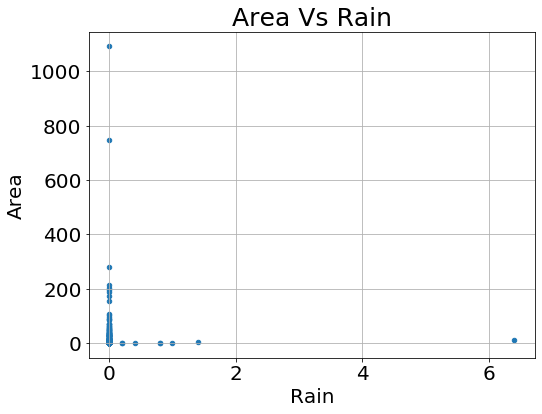

In [11]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area', ax = ax)
ax.set_title('Area Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

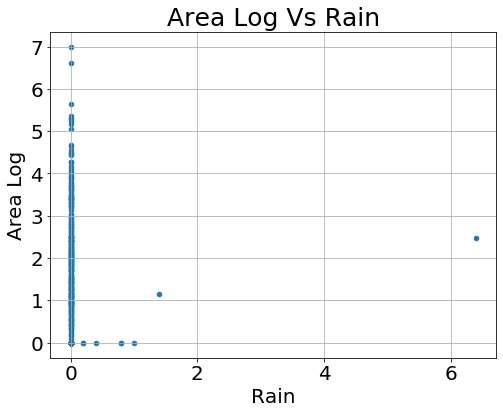

In [12]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area_log', ax = ax)
ax.set_title('Area Log Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area Log', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

There isn't many instances where it rains during the fire, but when it does, it limits the area spread given that we remove the two outlier points where rain is greater than 1mm

In [13]:
#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (forestfires['rain'] > 1) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
forestfires = forestfires.loc[FlagGood] 

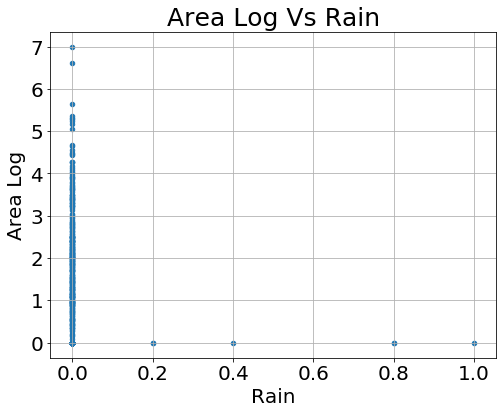

In [14]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
forestfires.plot.scatter(x = 'rain', y = 'area_log', ax = ax)
ax.set_title('Area Log Vs Rain', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Area Log', fontsize = 20)# Set text for y axis
ax.set_xlabel('Rain', fontsize = 20)
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.grid(True)
plt.show()

## Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
#Regression using rain & wind
attributes = forestfires[['rain', 'wind']]
y_output = forestfires['area_log']

In [17]:
# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(attributes)
attributes = scaler.transform(attributes)

In [18]:
#Getting the regression using sklearn
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

# Fit the data(train the model)
multi_model = regression_model.fit(attributes, y_output)

# Predict
y_predicted = multi_model.predict(attributes)

print('Intercept: \n', multi_model.intercept_) # pull out intercept
print('Coefficients: \n', multi_model.coef_) # pull out coeffeicients

Intercept: 
 1.1083044583654567
Coefficients: 
 [-0.11491713  0.10358004]


In [19]:
#Getting the regression with statsmodels
import statsmodels.api as sm

Attributes = sm.add_constant(attributes) # adding a constant
multi_model = sm.OLS(y_output, Attributes).fit()

# Get slope (m) and y-intercept (b)
print('Intercept/Constant & Coefficients : {}'.format(multi_model.params))

Intercept/Constant & Coefficients : const    1.108304
x1      -0.114917
x2       0.103580
dtype: float64


## Question 4.2: Calculate the mean squared error of predict results.

In [20]:
print('\nScaled: SSE, SST, SSR, and RMSE for All the Attributes:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - multi_model.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(multi_model.ssr))
print('RMSE: {}'.format(np.sqrt(multi_model.mse_model)))
print('R2: {}'.format(multi_model.rsquared))

predictions = multi_model.predict(Attributes) 


Scaled: SSE, SST, SSR, and RMSE for All the Attributes:
SSE: 11.160805723591011
SST: 1007.2496452608293
SSR: 996.0888395372383
RMSE: 2.362287633163139
R2: 0.011080476201806855


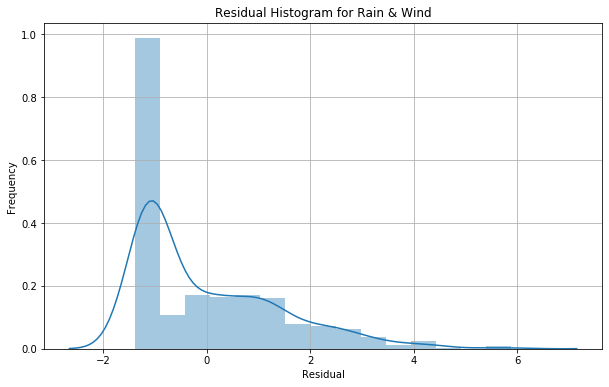

In [21]:
def histograms(a,b):
    plt.figure(figsize=(10, 6)).gca()
    sns.distplot(a.resid, hist=True)
    plt.grid(True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram for ' + b)
    
histograms(multi_model, 'Rain & Wind')

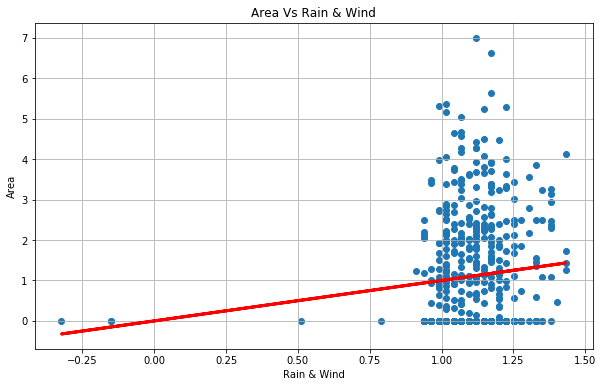

In [22]:
def scatters(a,b,c,d):
    plt.figure(figsize=(10, 6)).gca()
    plt.scatter(a, b)
    plt.plot(a, c, linewidth=3, color = 'red')
    plt.grid(True)
    plt.xlabel(d)
    plt.ylabel('Area')
    plt.title('Area Vs ' + d)

scatters(predictions, y_output, predictions, 'Rain & Wind')

## Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [23]:
forestfires_all = pd.get_dummies(forestfires, columns = ['month', 'day'])

In [24]:
forestfires_all.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
forestfires_features = forestfires_all.copy()
forestfires_features.drop(['area_log', 'area'], axis = 1, inplace = True)

In [26]:
columns = forestfires_features.columns.tolist()

In [27]:
#Regression using rain & wind
attributes_all = forestfires_features[columns]
y_output_all = forestfires['area_log']

#Normalization of the values
scaler_all = StandardScaler()
scaler_all.fit(attributes_all)
attributes_all = scaler_all.transform(attributes_all)

In [28]:
#Getting the regression using sklearn
#regression_model = LinearRegression()

# Fit the data(train the model)
multi_model_all = regression_model.fit(attributes_all, y_output_all)

# Predict
y_predicted_all = multi_model_all.predict(attributes_all)

print('Intercept: \n', multi_model_all.intercept_) # pull out intercept
print('Coefficients: \n', multi_model_all.coef_) # pull out coeffeicients

Intercept: 
 1.1083250156454645
Coefficients: 
 [ 1.31479188e-01 -2.28431840e-02  5.34492128e-02  2.62882260e-01
 -4.66758911e-01 -6.19929997e-02  2.39947459e-01  5.06346747e-02
  1.18679191e-01 -1.36688209e-01 -4.64679864e+10 -1.69517739e+11
 -4.64679864e+10 -6.85133081e+10 -2.20562167e+10 -8.56063332e+10
 -6.33572725e+10 -1.08643734e+11 -2.20562167e+10 -1.56112939e+10
 -5.96331804e+10 -1.67250962e+11 -4.67563364e+10 -4.43912476e+10
 -4.67563364e+10 -4.90849829e+10 -4.08935713e+10 -4.14669114e+10
 -3.87712264e+10]


In [35]:
Attributes_all = sm.add_constant(attributes_all) # adding a constant
multi_model_all = sm.OLS(y_output_all, Attributes_all).fit()

# Get slope (m) and y-intercept (b)
print('Intercept/Constant & Coefficients : {}'.format(multi_model_all.params))

Intercept/Constant & Coefficients : const    1.108304
x1       0.131455
x2      -0.022813
x3       0.053510
x4       0.262854
x5      -0.466611
x6      -0.062081
x7       0.239918
x8       0.050636
x9       0.118731
x10     -0.136668
x11     -0.047520
x12     -0.064637
x13      0.242801
x14     -0.032573
x15     -0.039718
x16     -0.086759
x17     -0.130122
x18     -0.213509
x19      0.018451
x20     -0.064267
x21      0.062136
x22      0.243642
x23     -0.071181
x24     -0.013196
x25      0.044675
x26      0.012313
x27     -0.035173
x28      0.060338
x29      0.004052
dtype: float64


## Question 5.2: Calculate the mean squared error of predict results.

In [30]:
print('\nScaled: SSE, SST, SSR, and RMSE for All the Attributes:')
mean_y_all = np.mean(y_output_all)
sst_all = np.sum((y_output_all - mean_y_all)**2)
sse_all = sst - multi_model_all.ssr
print('SSE: {}'.format(sse_all))
print('SST: {}'.format(sst_all))
print('SSR: {}'.format(multi_model_all.ssr))
print('RMSE: {}'.format(np.sqrt(multi_model_all.mse_model)))
print('R2: {}'.format(multi_model_all.rsquared))


Scaled: SSE, SST, SSR, and RMSE for All the Attributes:
SSE: -550.0891947078724
SST: 1007.2496452608293
SSR: 1557.3388399687017
RMSE: 1.7480706093776948
R2: 0.05031287574088339


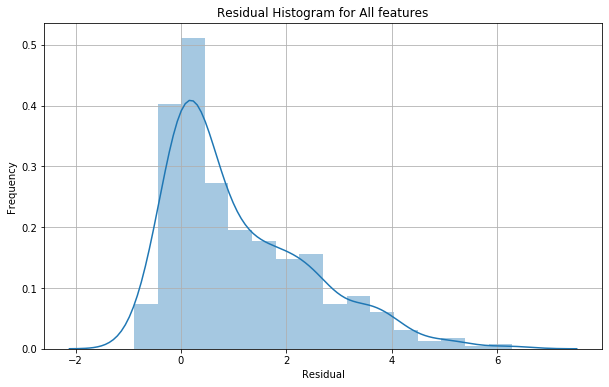

In [32]:
histograms(multi_model_all, 'All features')

In [36]:
predictions = multi_model_all.predict(Attributes_all) 

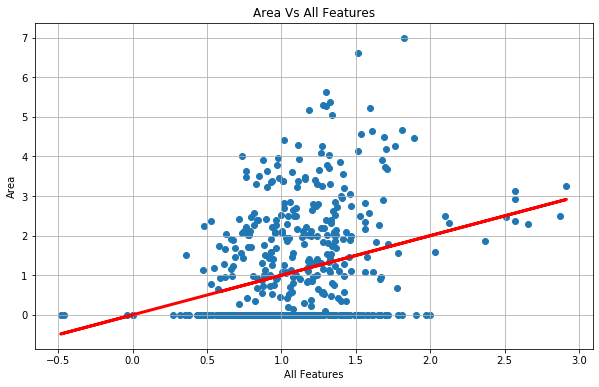

In [37]:
scatters(predictions, y_output_all, predictions, 'All Features')

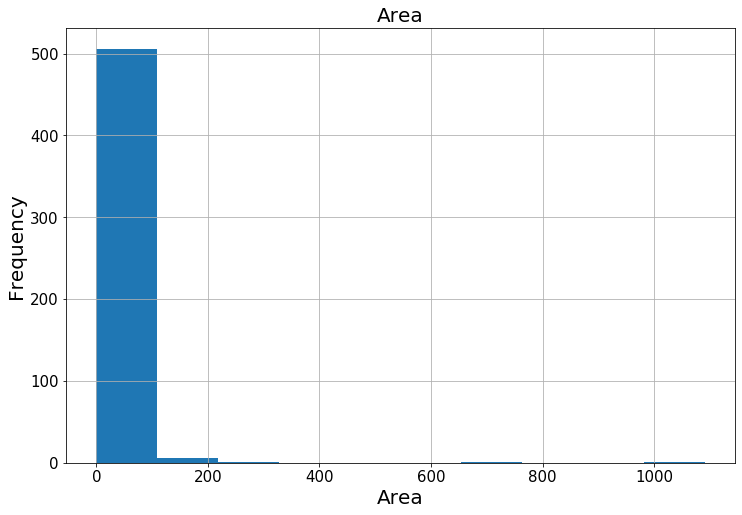

In [38]:
forestfires['area'].hist(figsize = (12,8))
plt.xlabel('Area', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Area', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

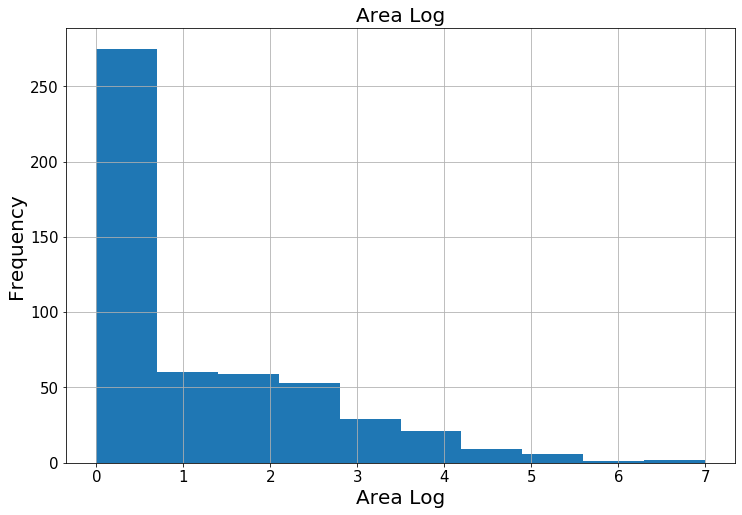

In [39]:
forestfires['area_log'].hist(figsize = (12,8))
plt.xlabel('Area Log', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Area Log', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()